# Curvando la línea para llevar un fraude
> Analisar el prep para mostrar el fraude desde la comidad de la casa

- toc:true
- branch: master
- badges: true
- comments: true
- categories: [python]

# Referencias a videos originales

El [EVITEMOS EL FRAUDE !! APRENDE A ANALIZAR EL PREP DEL INE CON PYTHON !!!
](https://www.youtube.com/watch?v=z11f__1O978) y las partes describiendo el código estan en

* 0:0:0-24:50 (peque pandas code para plotear lineas de diferencia de votos)
* 1:27:50-1:29:08 (como se ve un fraude)

Desgraciadamente el INE decidio quitar la página inicial del PREP, pero por fortuna no quitaron a donde apunta y se puede encontrar una copia en https://web.archive.org/web/20210526174841/https://www.ine.mx/voto-y-elecciones/prep/ que la ultima disponible es el 27 de Mayo del 2021.

Finalmente para descargar el mismo archivo que se muestra en el video navegar aquí y descargarlo localmente https://prep2018.ine.mx/#/diputaciones/nacional/1/3/1/1


---------------------

Este otro video explica más a fondo como se pueden detectar los fraudes más a fondo

[¡NO TE DEJES ENGAÑAR! MODELOS MATEMÁTICOS PARA DETECTAR FRAUDES ELECTORALES
](https://www.youtube.com/watch?v=7aKcE5FiGIg)

# Ejecutando en colab

Este notebook usa python y se puede ejecutar en la nube por cualquier persona.

Lo siguiente que tenemos que hacer es subirlo, lo unico que tienes que hacer es ejecutarlo mediante el menu

* Runtime -> Run all

ó

* Entorno de ejecución -> Ejecutar todas

ó simplemente mediante `CTRL+F9`

Al subirlo mediante el siguiente formulario debería de mostarse algo similar a esto
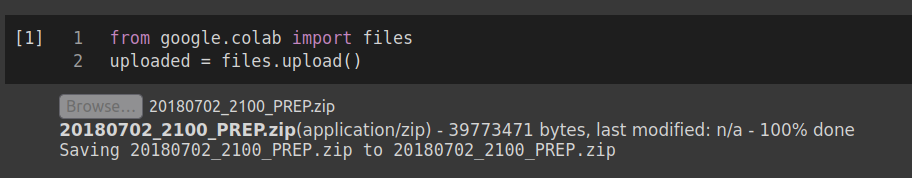

In [1]:
from google.colab import files
uploaded = files.upload()

In [2]:
%%time
# descomprimir el archivo que hayas subido desde el prep
!unzip 20180702_2100_PREP.zip

Archive:  20180702_2100_PREP.zip
 extracting: 20180702_2100_PREP_diputaciones.zip  
 extracting: 20180702_2100_PREP_presidencia.zip  
 extracting: 20180702_2100_PREP_senadurias.zip  
CPU times: user 7.46 ms, sys: 872 µs, total: 8.33 ms
Wall time: 273 ms


In [3]:
!unzip 20180702_2100_PREP_diputaciones.zip

Archive:  20180702_2100_PREP_diputaciones.zip
   creating: 20180702_2100_PREP_diputaciones/
  inflating: 20180702_2100_PREP_diputaciones/diputaciones.csv  
  inflating: 20180702_2100_PREP_diputaciones/diputaciones_candidaturas_2018.csv  
  inflating: 20180702_2100_PREP_diputaciones/LEEME.txt  


Si ya haz descomprimido los archivos, a partir de aquí puedes sacar las cuentas cumulativas entre un partido y el resto de partidos

In [4]:
# cargar las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 10))

In [5]:
# definimos algunos valores de las variables

partidos = ['MORENA', 'PAN', 'PRI', 'PRD']
tiempo='FECHA_HORA_CAPTURA'

In [6]:
# leemos los datos
datos = pd.read_csv('20180702_2100_PREP_diputaciones/diputaciones.csv', sep='|', engine='python', header=5)

In [7]:
# vamos a descartar las líneas que no se contabilizaron
lineas_malas = datos[datos['CONTABILIZADA']==0].index
datos.drop(lineas_malas, inplace=True)

In [8]:
def limpia(data, columna):
    data[columna] = data[columna].replace('-', 0)
    data[columna] = data[columna].replace('Ilegible', 0)
    data[columna] = data[columna].replace('Sin dato', 0)
    data[columna] = pd.to_numeric(data[columna], errors='raise')

In [9]:
for partido in partidos:
    limpia(datos, partido)

In [10]:
datos.sample(5)

,CLAVE_CASILLA,CLAVE_ACTA,ID_ESTADO,ESTADO,ID_DISTRITO_FEDERAL,DISTRITO_FEDERAL,SECCION,ID_CASILLA,TIPO_CASILLA,EXT_CONTIGUA,...,CONTABILIZADA,MECANISMOS_TRASLADO,SHA,FECHA_HORA_ACOPIO,FECHA_HORA_CAPTURA,FECHA_HORA_VERIFICACION,ORIGEN,DIGITALIZACION,TIPO_DOCUMENTO,COTEJADA
1373,'010263C0100','010263C010006',1,AGUASCALIENTES,3,Aguascalientes,0263,1,C,0,...,1,D,4ab896849e13fcc2a26b1962115c2041d23bff9e8bee0b...,2018-07-01 22:28:00,2018-07-01 23:06:00,2018-07-01 23:08:02,CATD,ESC�NER,Acta PREP,1
15969,'071735C0200','071735C020006',7,CHIAPAS,6,Tuxtla Guti�rrez,1735,2,C,0,...,0,D,-,-,-,-,CATD,ESC�NER,-,-
142531,'301356B0100','301356B010006',30,VERACRUZ,2,Tantoyuca,1356,1,B,0,...,1,D,c153534dc09dee6577bdf41e45204db25ac05237b3ed04...,2018-07-02 08:27:00,2018-07-02 09:22:00,2018-07-02 09:23:27,CATD,ESC�NER,Acta PREP,1
98989,'191505C0200','191505C020006',19,NUEVO LE�N,6,Monterrey,1505,2,C,0,...,1,D,1f48bb9db93215c4db2a46c73a7459122e9b6956fa4a81...,2018-07-02 16:26:00,2018-07-02 16:45:00,2018-07-02 16:46:18,CATD,ESC�NER,Acta PREP,-
150484,'304531C0100','304531C010006',30,VERACRUZ,16,C�rdoba,4531,1,C,0,...,1,F-D,2f7475f3513f0981216175beb202322a5bb37ca524ad65...,2018-07-01 21:56:00,2018-07-01 23:03:00,2018-07-01 23:29:15,CASILLA,M�VIL,Acta PREP,1


In [11]:
# ordenamos los datos por tiempo (la columna 'FECHA_HORA_CAPTURA')
datos_ordenados = datos.sort_values(by=[tiempo])
datos_ordenados.reset_index(inplace=True)

MORENA vs PAN
MORENA vs PRI
MORENA vs PRD


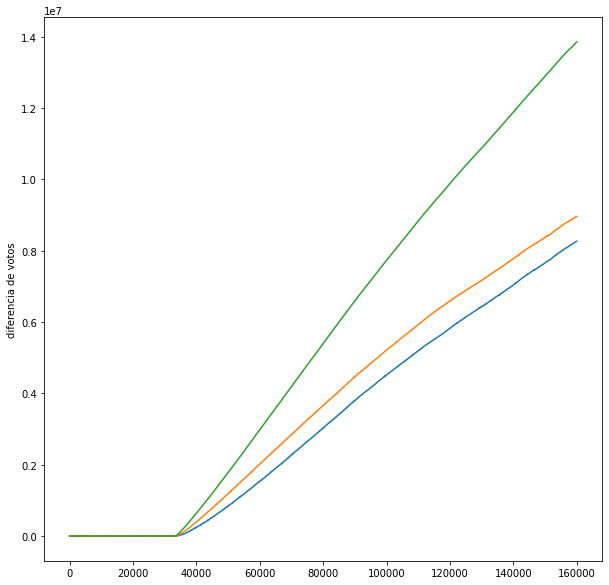

In [12]:
diferencias = []
for partido in partidos[1:]:
    base = partidos[0]
    contra = partido
    print(base, 'vs', partido)
    resta = np.cumsum(datos_ordenados[base]-datos_ordenados[contra])
    diferencias.append(resta)


for d in diferencias:
    plt.plot(d)
plt.ylabel('diferencia de votos')
plt.show()

# Dudas o comentarios

Aquí abajo puedes dejar tus comentarios o dudas que tengas para ejecutar tu mismo este análisis y talvez después otros si más gente coopera al conocimiento colectivo, ¡vamos que es fácil compartir!, recuerden que las cosas que no se coparten se pierden.